In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
df_ = pd.read_csv('AirlineTweets.csv')

In [ ]:
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df = df_[['airline_sentiment','text']].copy()

In [ ]:
df.head()


,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


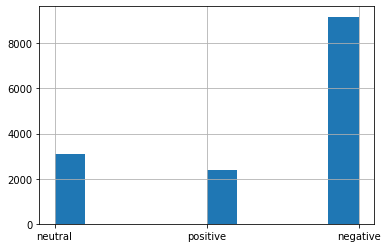

In [ ]:
df['airline_sentiment'].hist()

In [ ]:
target_map ={'positive':1,'negative':0,'neutral':2}
df['target'] = df['airline_sentiment'].map(target_map)

In [ ]:
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [ ]:
df_train,df_test = train_test_split(df)

In [ ]:
df_train

,airline_sentiment,text,target
5866,neutral,@SouthwestAir yes please,2
6891,negative,@JetBlue I understand why ur doing it. But for...,0
8795,negative,@JetBlue so technically I could drive to JFK n...,0
6409,positive,@SouthwestAir Glad it was finally resolved too...,1
2690,negative,"@united never fails, flying FC order ravioli g...",0
...,...,...,...
7399,negative,"@JetBlue if you want to be helpful, find us a ...",0
1685,negative,@united the most frustrating flying experience...,0
5485,positive,@SouthwestAir thanks for an awesome flight and...,1
11060,negative,"@USAirways flight 500 out of Seattle has 10,00...",0


In [ ]:
V = TfidfVectorizer(max_features=2000)

In [ ]:
xtrain = V.fit_transform(df_train['text'])

In [ ]:
xtrain

<10980x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 157564 stored elements in Compressed Sparse Row format>

In [ ]:
xtest = V.transform(df_test['text'])

In [ ]:
xtest

<3660x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 52482 stored elements in Compressed Sparse Row format>

In [ ]:
ytrain = df_train['target']
ytest = df_test['target']

In [ ]:
model = LogisticRegression(max_iter=500)
# try removing the max _iter argument ad this will result in an warining saying that the value must be increasedpr_
model.fit(xtrain,ytrain)
print(" the  train accurracy is  ->",model.score(xtrain,ytrain))
print(" the test accuracy is  ->",model.score(xtest,ytest))

 the  train accurracy is  -> 0.8564663023679417
 the test accuracy is  -> 0.8032786885245902


In [ ]:
pr_train = model.predict_proba(xtrain)
pr_test = model.predict_proba(xtest)

print(" the train accuracy is ",roc_auc_score(ytrain,pr_train,multi_class = 'ovo'))
#"ovo": stands for " one versus one " 
# this is opposed to This is opposed to one versus rest.
#Essentially, these are two different strategies to build a multi class model from a binary model.
print(" the test accuracy is ",roc_auc_score(ytest,pr_test, multi_class = 'ovo'))

 the train accuracy is  0.9443086335334443
 the test accuracy is  0.8908289762239575


In [ ]:
p_train = model.predict(xtrain)
p_test = model.predict(xtest)


In [ ]:
cm = confusion_matrix(ytrain,p_train, normalize='true')

In [ ]:
cm

array([[0.96121318, 0.00947798, 0.02930884],
       [0.18253521, 0.72957746, 0.08788732],
       [0.303366  , 0.05027695, 0.64635705]])

In [ ]:
def plot_cm(cm):
  classes = ['negative','positive','neutral']
  df_c  = pd.DataFrame(cm,index= classes,columns = classes)
  ax = sn.heatmap(df_c,annot=True,fmt='g')

  ax.set_xlabel('predicted')
  ax.set_ylabel('target')

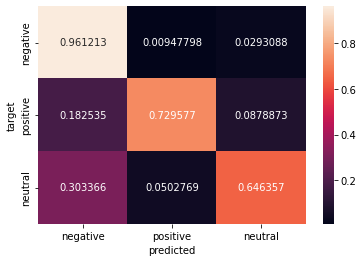

In [ ]:
plot_cm(cm)

In [ ]:
cm = confusion_matrix(ytest,p_test, normalize='true')

In [ ]:
cm

array([[0.94482759, 0.01293103, 0.04224138],
       [0.25340136, 0.5952381 , 0.15136054],
       [0.40824468, 0.0625    , 0.52925532]])

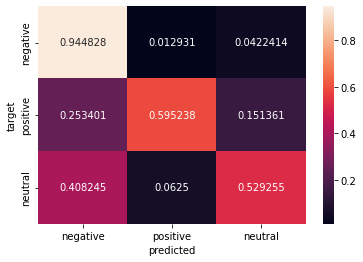

In [ ]:
plot_cm(cm)

**bold text**
Part 2  binary targets 




In [ ]:
binary_target_list = [target_map['positive'],target_map['negative']]
df_b_train = df_train[df_train['target'].isin(binary_target_list)] 
df_b_test = df_test[df_test['target'].isin(binary_target_list)]

In [ ]:
df_b_train.head()

,airline_sentiment,text,target
6891,negative,@JetBlue I understand why ur doing it. But for...,0
8795,negative,@JetBlue so technically I could drive to JFK n...,0
6409,positive,@SouthwestAir Glad it was finally resolved too...,1
2690,negative,"@united never fails, flying FC order ravioli g...",0
969,negative,@united of course I did. The bag should be her...,0


In [ ]:
df_b_train.shape

(8633, 3)

In [ ]:
xtrain = V.fit_transform(df_b_train['text'])
xtest = V.transform(df_b_test['text'])

In [ ]:
ytrain = df_b_train['target']
ytest = df_b_test['target']

In [ ]:
model = LogisticRegression(max_iter=500)
# try removing the max _iter argument ad this will result in an warining saying that the value must be increasedpr_
model.fit(xtrain,ytrain)
print(" the  train accurracy is  ->",model.score(xtrain,ytrain))
print(" the test accuracy is  ->",model.score(xtest,ytest))

 the  train accurracy is  -> 0.9282983898992239
 the test accuracy is  -> 0.9129986244841816


In [ ]:
pr_train = model.predict_proba(xtrain)[:,1]
pr_test = model.predict_proba(xtest)[:,1]

print(" the train accuracy is ",roc_auc_score(ytrain,pr_train))
# thsi is done in normal 
# that is there are only binry classes again and thus the multi_class argument is no longer required 
print(" the test accuracy is ",roc_auc_score(ytest,pr_test))

 the train accuracy is  0.9790499837755022
 the test accuracy is  0.9536304392446634


In [ ]:
pr_test.shape

(2908,)

In [ ]:
max_prob =0
for index,prob in enumerate(pr_test):
  if prob>max_prob:
    max_prob =prob
    max_index = index



In [ ]:
max_index

1317

In [ ]:
df_b_test[:1318].tail()

,airline_sentiment,text,target
274,negative,"@VirginAmerica moved my seat with no notice. ""...",0
12027,negative,@AmericanAir how can I get you guys to respond...,0
13611,negative,@AmericanAir love how you can't get an agent o...,0
7905,negative,@JetBlue now we are delayed until 1:02! This i...,0
5909,positive,@SouthwestAir Thank you. Great tool,1


In [ ]:
df_b_test['text'][7905]

'@JetBlue now we are delayed until 1:02! This is ridiculous'

In [ ]:
model.coef_
# this is to obtain the weight of a trained model
# the output is an 1* D matrix where the "D"  represents the input features

array([[-0.24621742,  0.0467344 , -0.17094683, ...,  0.12216688,
        -0.01880553, -0.47516736]])

In [ ]:
model.coef_.shape

(1, 2000)

(array([  2.,   2.,   0.,   5.,   3.,  17.,  36.,  97., 421., 817., 367.,
        138.,  50.,  22.,   6.,   2.,   3.,   5.,   2.,   1.,   1.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([-4.05050848, -3.63437343, -3.21823837, -2.80210332, -2.38596826,
        -1.96983321, -1.55369815, -1.1375631 , -0.72142804, -0.30529299,
         0.11084207,  0.52697712,  0.94311218,  1.35924724,  1.77538229,
         2.19151735,  2.6076524 ,  3.02378746,  3.43992251,  3.85605757,
         4.27219262,  4.68832768,  5.10446273,  5.52059779,  5.93673284,
         6.3528679 ,  6.76900295,  7.18513801,  7.60127306,  8.01740812,
         8.43354317]),
 <a list of 30 Patch objects>)

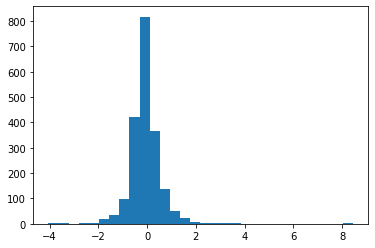

In [ ]:
plt.hist(model.coef_[0],bins=30)

In [ ]:
word_index_mapping = V.vocabulary_
word_index_mapping

{'jetblue': 980,
 'understand': 1843,
 'why': 1941,
 'ur': 1865,
 'doing': 570,
 'it': 971,
 'but': 288,
 'for': 764,
 'someone': 1618,
 'who': 1937,
 'just': 987,
 'traveled': 1801,
 'hours': 910,
 'to': 1775,
 'get': 809,
 'here': 884,
 'early': 599,
 'b4': 207,
 'flight': 737,
 'etc': 638,
 'notice': 1222,
 'maybe': 1111,
 'so': 1608,
 'could': 446,
 'drive': 585,
 'jfk': 982,
 'now': 1225,
 'and': 139,
 'put': 1398,
 'in': 939,
 'request': 1455,
 'tomorrow': 1779,
 'southwestair': 1631,
 'glad': 817,
 'was': 1903,
 'finally': 721,
 'resolved': 1465,
 'too': 1782,
 'bad': 211,
 'can': 303,
 'free': 776,
 'voucher': 1891,
 'go': 819,
 'with': 1951,
 'mine': 1150,
 'have': 864,
 'friend': 780,
 'travel': 1800,
 'next': 1204,
 'time': 1768,
 'united': 1849,
 'never': 1199,
 'fails': 686,
 'flying': 758,
 'order': 1258,
 'chicken': 356,
 'tell': 1724,
 'the': 1740,
 'fa': 677,
 'she': 1562,
 'says': 1522,
 'you': 1994,
 'should': 1568,
 'of': 1231,
 'told': 1778,
 'me': 1114,
 'other': 

In [ ]:
len(word_index_mapping)

2000

In [ ]:
#looking at rthe weights of the diffrent words 
# diifrrent values of threshold can be used

threshold=2
print(" the most positive words")
for key, index in word_index_mapping.items():

  weight = model.coef_[0][index]
  if weight>threshold :
    print(key,weight)


jetblue 3.1687669440215043
southwestair 3.178363996668899
thank 8.433543171985287
great 5.336653102900139
thx 3.0677852353535933
best 3.611312991410004
cool 2.2453779053920857
thanks 8.185145911759475
love 4.300675559150555
amazing 3.8445023225387893
good 2.9948468561237402
kudos 2.8110931246584965
wonderful 2.3608148837417886
virginamerica 3.3422748267608466
awesome 3.990837772186983
appreciate 2.8449574485274005
worries 3.0431468647642514
excellent 2.1706730589490144


In [ ]:
threshold=2
print(" the most negative words")
for key, index in word_index_mapping.items():

  weight = model.coef_[0][index]
  if weight<threshold :
    print(key,weight)


 the most negative words
understand -0.17883993221456287
why -2.46166707201652
ur 0.18887642822625053
doing 0.4942661336772872
it 0.11094373590486366
but -1.5698872078580612
for -0.19555117564406727
someone -0.9027212831885435
who 0.5528898069375929
just 0.8043214663999128
traveled -0.254901571754378
hours -3.293585328098158
to -0.7997781033654521
get -0.7164826456624294
here -0.3259261140684839
early 0.3671883527895666
b4 -0.08806443386740055
flight -0.927153927996231
etc 0.11203670350353949
notice -0.23104321181673768
maybe -0.22581351045919393
so 1.0425990712538022
could -0.40765868921776216
drive -0.4814656631192442
jfk -0.058843899876142
now -1.1160716368195038
and -0.9744438030851268
put -0.7305720696725218
in 0.06960296846137463
request -0.5532211743869698
tomorrow -0.6887404931248349
glad 1.1680439303039636
was 0.5426941128554557
finally 0.9910030469376265
resolved 0.9878938783877123
too 1.1555165017785891
bad -0.8859183529304333
can -1.6958066937261969
free 0.7252119519261608
